In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
fish = pd.read_csv('../data/fish.csv')

In [3]:
fish.head()

,#,Name,Sell,Where/How,Shadow,Total Catches to Unlock,Spawn Rates,Rain/Snow Catch Up,NH Jan,NH Feb,...,SH Dec,Color 1,Color 2,Size,Lighting Type,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
0,56,anchovy,200,Sea,Small,0,2–5,No,4 AM – 9 PM,4 AM – 9 PM,...,4 AM – 9 PM,Blue,Red,1x1,No lighting,Fish81,FishAntyobi,FtrFishAntyobi,4201,LzuWkSQP55uEpRCP5
1,36,angelfish,3000,River,Small,20,2–5,No,NaN,NaN,...,4 PM – 9 AM,Yellow,Black,1x1,Fluorescent,Fish30,FishAngelfish,FtrFishAngelfish,2247,XTCFCk2SiuY5YXLZ7
2,44,arapaima,10000,River,XX-Large,50,1,Yes,NaN,NaN,...,4 PM – 9 AM,Black,Blue,3x2,No lighting,Fish36,FishPiraruku,FtrFishPiraruku,2253,mZy4BES54bqwi97br
3,41,arowana,10000,River,Large,50,1–2,No,NaN,NaN,...,4 PM – 9 AM,Yellow,Black,2x1,Fluorescent,Fish33,FishArowana,FtrFishArowana,2250,F68AvCaqddBJL7ZSN
4,58,barred knifejaw,5000,Sea,Medium,20,3–5,No,NaN,NaN,...,All day,White,Black,1x1,Fluorescent,Fish47,FishIshidai,FtrFishIshidai,2265,X3R9SFSAaDzBF4fE3


In [4]:
fish.columns = fish.columns.str.lower()
fish.columns = fish.columns.str.replace(' ', '_')
fish.columns = fish.columns.str.replace('/', '_')

In [5]:
fish.columns

Index(['#', 'name', 'sell', 'where_how', 'shadow', 'total_catches_to_unlock',
       'spawn_rates', 'rain_snow_catch_up', 'nh_jan', 'nh_feb', 'nh_mar',
       'nh_apr', 'nh_may', 'nh_jun', 'nh_jul', 'nh_aug', 'nh_sep', 'nh_oct',
       'nh_nov', 'nh_dec', 'sh_jan', 'sh_feb', 'sh_mar', 'sh_apr', 'sh_may',
       'sh_jun', 'sh_jul', 'sh_aug', 'sh_sep', 'sh_oct', 'sh_nov', 'sh_dec',
       'color_1', 'color_2', 'size', 'lighting_type', 'icon_filename',
       'critterpedia_filename', 'furniture_filename', 'internal_id',
       'unique_entry_id'],
      dtype='object')

In [6]:
fish = fish.drop(columns=["#", 'total_catches_to_unlock',
                          'color_1', 'color_2', 'size',
                          'lighting_type', 'icon_filename',
                          'critterpedia_filename', 'furniture_filename', 
                          'internal_id', 'unique_entry_id'])

In [7]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 30 columns):
name                  80 non-null object
sell                  80 non-null int64
where_how             80 non-null object
shadow                80 non-null object
spawn_rates           80 non-null object
rain_snow_catch_up    80 non-null object
nh_jan                31 non-null object
nh_feb                31 non-null object
nh_mar                35 non-null object
nh_apr                39 non-null object
nh_may                44 non-null object
nh_jun                55 non-null object
nh_jul                58 non-null object
nh_aug                60 non-null object
nh_sep                63 non-null object
nh_oct                42 non-null object
nh_nov                37 non-null object
nh_dec                32 non-null object
sh_jan                58 non-null object
sh_feb                60 non-null object
sh_mar                63 non-null object
sh_apr                42 non-null obj

In [8]:
# Defining month column lists to segment if needed
sh_month_cols = [c for c in fish.columns.to_list() if "sh_" in c]
nh_month_cols = [c for c in fish.columns.to_list() if "nh_" in c]

month_cols = sh_month_cols + nh_month_cols

In [9]:
fish.head()

,name,sell,where_how,shadow,spawn_rates,rain_snow_catch_up,nh_jan,nh_feb,nh_mar,nh_apr,...,sh_mar,sh_apr,sh_may,sh_jun,sh_jul,sh_aug,sh_sep,sh_oct,sh_nov,sh_dec
0,anchovy,200,Sea,Small,2–5,No,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,...,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM
1,angelfish,3000,River,Small,2–5,No,NaN,NaN,NaN,NaN,...,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM
2,arapaima,10000,River,XX-Large,1,Yes,NaN,NaN,NaN,NaN,...,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM
3,arowana,10000,River,Large,1–2,No,NaN,NaN,NaN,NaN,...,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM
4,barred knifejaw,5000,Sea,Medium,3–5,No,NaN,NaN,All day,All day,...,All day,All day,All day,NaN,NaN,NaN,All day,All day,All day,All day


In [10]:
fish["time"] = ""

In [11]:
for i, row in fish.iterrows():
    nonnulllist = fish.iloc[i][month_cols].dropna()
    times = list(set(nonnulllist))
    if len(times) == 1:
        value = times[0]
    else:
        value = "varies"
    fish.at[i, 'time'] = value

In [12]:
fish['time'].value_counts()

All day                     42
4 PM – 9 AM                 16
9 AM – 4 PM                 10
4 AM – 9 PM                  5
9 PM – 4 AM                  4
varies                       2
9 AM – 4 PM; 9 PM – 4 AM     1
Name: time, dtype: int64

In [13]:
# TIL char and cherry salmon are stupid
fish.loc[fish['time'] == 'varies'][['name'] + sh_month_cols]

,name,sh_jan,sh_feb,sh_mar,sh_apr,sh_may,sh_jun,sh_jul,sh_aug,sh_sep,sh_oct,sh_nov,sh_dec
15,char,NaN,NaN,All day,All day,All day,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM
16,cherry salmon,NaN,NaN,All day,All day,All day,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM


In [14]:
# Mapping Y/N to 1/0 for indicator col
yn_map = {"Yes": 1, "No":0}
fish['rain_snow_catch_up'] = [yn_map[item] for item in fish['rain_snow_catch_up']]

In [15]:
# Creating min/max spawn cols from range col
fish['min_spawn'] = fish['spawn_rates']
fish['max_spawn'] = fish['spawn_rates']

for i, row in fish.iterrows():
    if "–" in fish['spawn_rates'][i]:
        fish.at[i,'min_spawn'] = row['spawn_rates'].split("–")[0]
        fish.at[i,'max_spawn'] = row['spawn_rates'].split("–")[-1]

# forcing these to read as ints because it refused otherwise
fish['min_spawn'] = fish['min_spawn'].astype(int)
fish['max_spawn'] = fish['max_spawn'].astype(int)

In [16]:
# Mapping fish avail times to descriptors
fish_avail_map = {'4 AM – 9 PM': "day",
                  '9 AM –\xa04 PM': "midday",
                  '4 PM –\xa09 AM': "night",
                  '9 PM –\xa04 AM': "late",
                  '9 AM –\xa04 PM; 9 PM – 4 AM': "midday, late",
                  'All day': "all",
                  'varies': 'varies'}

fish['time'] = [fish_avail_map[item] for item in fish['time']]

In [17]:
where_how_map = {
    "Sea": ["sea", "sea"],
    "River": ["river", "river"],
    "Pond": ["pond", "pond"],
    "River (clifftop)": ["river", "clifftop"],
    "Pier": ["sea", "pier"],
    "River (mouth)": ["river", "mouth"],
    "Sea (rainy days)": ["sea", "precipitation"]
}

In [18]:
# Creating cols for primary vs. sub locations
fish['where'] = fish['where_how']
fish['where_sub'] = fish['where_how']

for i, row in fish.iterrows():
    orig_val = row['where']
    where_main = where_how_map[orig_val][0]
    where_sub = where_how_map[orig_val][1]
    fish.at[i, 'where'] = where_main
    fish.at[i, 'where_sub'] = where_sub
    
fish = fish.drop(columns = "where_how")

In [19]:
fish.head()

,name,sell,shadow,spawn_rates,rain_snow_catch_up,nh_jan,nh_feb,nh_mar,nh_apr,nh_may,...,sh_aug,sh_sep,sh_oct,sh_nov,sh_dec,time,min_spawn,max_spawn,where,where_sub
0,anchovy,200,Small,2–5,0,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,...,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,day,2,5,sea,sea
1,angelfish,3000,Small,2–5,0,NaN,NaN,NaN,NaN,4 PM – 9 AM,...,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM,night,2,5,river,river
2,arapaima,10000,XX-Large,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4 PM – 9 AM,night,1,1,river,river
3,arowana,10000,Large,1–2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4 PM – 9 AM,night,1,2,river,river
4,barred knifejaw,5000,Medium,3–5,0,NaN,NaN,All day,All day,All day,...,NaN,All day,All day,All day,All day,all,3,5,sea,sea


In [20]:
fish['shadow'].value_counts()

Small           17
X-Small         13
Medium          13
Large           12
X-Large         10
XX-Large         7
Large w/Fin      5
Long             2
Medium w/Fin     1
Name: shadow, dtype: int64

In [21]:
# Combining fin distinctions because it's impossible to tell
for i, row in fish.iterrows():
    if "w/Fin" in row['shadow']:
        fish.at[i, 'shadow'] = 'Fin'

In [22]:
fish['shadow'].value_counts()

Small       17
X-Small     13
Medium      13
Large       12
X-Large     10
XX-Large     7
Fin          6
Long         2
Name: shadow, dtype: int64

In [27]:
# # creating new 'available' cols
# avail_cols = [str(col) + "_avail" for col in month_cols]
# fish[avail_cols] = fish[month_cols]
# fish[avail_cols] = (~fish[month_cols].isna())

In [23]:
# fish.to_csv('../data/fish_clean.csv', index=False)

### Creating Dataframe where Index is Hem/Month

In [22]:
# Getting the num of available fish per month per hemisphere
month_totals = (~fish[month_cols].isna()).sum()

In [23]:
month_totals

sh_jan    58
sh_feb    60
sh_mar    63
sh_apr    42
sh_may    37
sh_jun    32
sh_jul    31
sh_aug    31
sh_sep    35
sh_oct    39
sh_nov    44
sh_dec    55
nh_jan    31
nh_feb    31
nh_mar    35
nh_apr    39
nh_may    44
nh_jun    55
nh_jul    58
nh_aug    60
nh_sep    63
nh_oct    42
nh_nov    37
nh_dec    32
dtype: int64

### Exploring Shadow Size vs. Sale Price, for each fishing location

In [24]:
shadow_order = ['X-Small',
                'Small',
                'Medium',
                'Long',
                'Fin',
                'Large',
                'X-Large',
                'XX-Large']

In [25]:
# # could lowercase shadow sizes if we wanted
# fish['shadow'].apply(lambda x: x.lower())

# shadow_order = ['x-small',
#                 'small',
#                 'medium',
#                 'long',
#                 'fin',
#                 'large',
#                 'x-large',
#                 'xx-large']

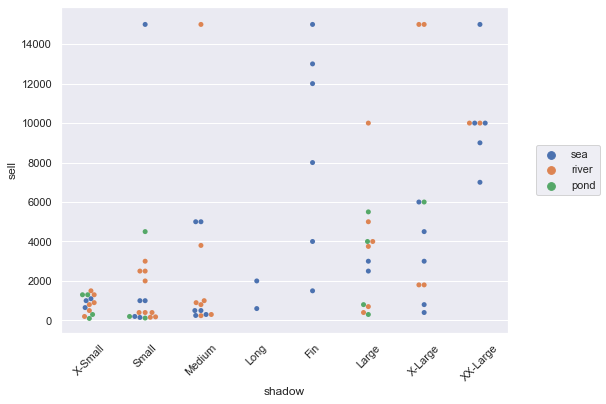

In [25]:
plt.figure(figsize=(8,6))
sns.swarmplot('shadow', 'sell', data=fish, 
              hue='where', 
              order=shadow_order)
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.show()

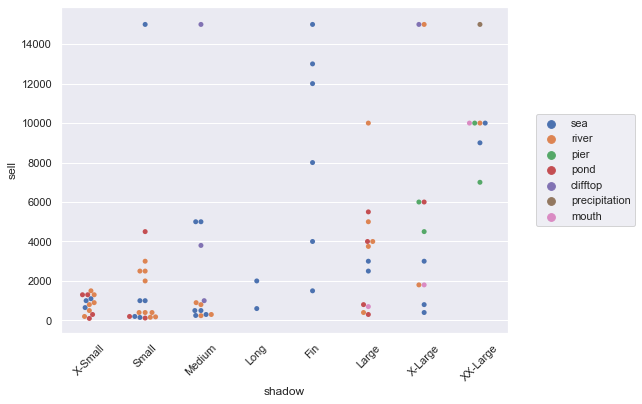

In [26]:
plt.figure(figsize=(8,6))
sns.swarmplot('shadow', 'sell', data=fish, 
              hue='where_sub', 
              order=shadow_order)
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.show()

## Attempting a Function!

In [28]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 34 columns):
name                  80 non-null object
sell                  80 non-null int64
shadow                80 non-null object
spawn_rates           80 non-null object
rain_snow_catch_up    80 non-null int64
nh_jan                31 non-null object
nh_feb                31 non-null object
nh_mar                35 non-null object
nh_apr                39 non-null object
nh_may                44 non-null object
nh_jun                55 non-null object
nh_jul                58 non-null object
nh_aug                60 non-null object
nh_sep                63 non-null object
nh_oct                42 non-null object
nh_nov                37 non-null object
nh_dec                32 non-null object
sh_jan                58 non-null object
sh_feb                60 non-null object
sh_mar                63 non-null object
sh_apr                42 non-null object
sh_may                37 non-null obje

In [55]:
month_key = 'January'

In [56]:
month_key[:3].lower()

'jan'

In [29]:
def find_best_fish(data, hemisphere, month):
    '''
    Inputs:
    data: pandas dataframe
        needs to have where/where_sub and min/max spawn
    hemisphere: str
        either "sh" or "nh"
    month: str
        3-letter abbreviation for month (ie "jun")
    '''
    cols = ['name', 'sell', 'shadow', 'spawn_rates',
            'rain_snow_catch_up', 'where', 'where_sub',
            'min_spawn', 'max_spawn']
    month_col = hemisphere + "_" + month
    cols.append(month_col)

    data = data[cols]
    
    data = data[~data[month_col].isna()]
    
    shadow_sizes = list(data['shadow'].unique())
    loc_types = list(data['where'].unique())
    
    data['min_spawn_perc'] = data['min_spawn'].astype(float)
    data['max_spawn_perc'] = data['max_spawn'].astype(float)
    
    for loc in loc_types:
        temp = data.loc[data['where'] == loc]
        tot_min_spawn = temp['min_spawn'].sum()
        tot_max_spawn = temp['max_spawn'].sum()
            
        for i in temp.index:
            data.at[i, 'min_spawn_perc'] = round((data['min_spawn'][i]/tot_min_spawn) * 100, 2)
            data.at[i, 'max_spawn_perc'] = round((data['max_spawn'][i]/tot_max_spawn) * 100, 2)
            
    data['min_sell'] = (data['min_spawn_perc'] * data['sell']) / 100
    data['max_sell'] = (data['max_spawn_perc'] * data['sell']) / 100
    
    return data

In [30]:
test = find_best_fish(fish, "nh", "jun")

In [31]:
test

,name,sell,shadow,spawn_rates,rain_snow_catch_up,where,where_sub,min_spawn,max_spawn,nh_jun,min_spawn_perc,max_spawn_perc,min_sell,max_sell
0,anchovy,200,Small,2–5,0,sea,sea,2,5,4 AM – 9 PM,2.47,4.39,4.940,8.780
1,angelfish,3000,Small,2–5,0,river,river,2,5,4 PM – 9 AM,3.70,4.46,111.000,133.800
2,arapaima,10000,XX-Large,1,1,river,river,1,1,4 PM – 9 AM,1.85,0.89,185.000,89.000
3,arowana,10000,Large,1–2,0,river,river,1,2,4 PM – 9 AM,1.85,1.79,185.000,179.000
4,barred knifejaw,5000,Medium,3–5,0,sea,sea,3,5,All day,3.70,4.39,185.000,219.500
5,barreleye,15000,Small,1,0,sea,sea,1,1,9 PM – 4 AM,1.23,0.88,184.500,132.000
6,betta,2500,Small,1–4,0,river,river,1,4,9 AM – 4 PM,1.85,3.57,46.250,89.250
8,black bass,400,Large,4–12,0,river,river,4,12,All day,7.41,10.71,29.640,42.840
11,bluegill,180,Small,6–10,0,river,river,6,10,9 AM – 4 PM,11.11,8.93,19.998,16.074
12,butterfly fish,1000,Small,4–5,0,sea,sea,4,5,All day,4.94,4.39,49.400,43.900


In [32]:
test.groupby(['where', 'shadow']).mean()[['sell', 'min_sell', 'max_sell']]

sell    min_sell    max_sell
where shadow                                            
pond  Large          2650.000000  147.820000  140.945000
      Small          1606.666667   58.520000   64.924000
      X-Large        6000.000000  171.600000  187.200000
      X-Small         750.000000   28.590000   37.485000
river Large          4850.000000  118.410000   97.860000
      Medium         1460.000000   60.731000   75.453000
      Small          1456.666667   41.692333   56.850000
      X-Large       15000.000000  277.500000  268.500000
      X-Small         860.000000   34.784000   22.522000
      XX-Large      10000.000000  185.000000   89.000000
sea   Large          3000.000000  185.100000  184.200000
      Large w/Fin   12000.000000  194.100000  138.225000
      Long            600.000000   14.820000   10.500000
      Medium         2000.000000   88.416667   99.483333
      Medium w/Fin   1500.000000   37.050000   26.250000
      Small          3470.000000   57.892000   45.962000
      X-Large        2925.000000   55.747500   49.410000
      X-Small         875.000000   53.987500   50.865000
      XX-Large      15000.000000  184.500000  262.500000

In [33]:
test.groupby('where').sum()[['sell', 'min_sell', 'max_sell']]

,sell,min_sell,max_sell
where,,,
pond,24420,1052.800,1095.692
river,63280,1603.138,1504.462
sea,104900,2083.545,1863.980


In [34]:
test['min_spawn'].sum()

170

In [35]:
t2 = test[test['where'] == 'sea']
t2['min_spawn'].sum()

81

In [36]:
t2['max_spawn'].sum()

114

In [37]:
test[test['where'] == "pond"]

,name,sell,shadow,spawn_rates,rain_snow_catch_up,where,where_sub,min_spawn,max_spawn,nh_jun,min_spawn_perc,max_spawn_perc,min_sell,max_sell
13,carp,300,Large,3–9,0,pond,pond,3,9,All day,8.57,14.06,25.71,42.180
14,catfish,800,Large,6–8,0,pond,pond,6,8,4 PM – 9 AM,17.14,12.50,137.12,100.000
19,crawfish,200,Small,4–12,0,pond,pond,4,12,All day,11.43,18.75,22.86,37.500
26,frog,120,Small,7–9,0,pond,pond,7,9,All day,20.00,14.06,24.00,16.872
27,gar,6000,X-Large,1–2,0,pond,pond,1,2,4 PM – 9 AM,2.86,3.12,171.60,187.200
28,giant snakehead,5500,Large,2,0,pond,pond,2,2,9 AM – 4 PM,5.71,3.12,314.05,171.600
31,goldfish,1300,X-Small,1–4,0,pond,pond,1,4,All day,2.86,6.25,37.18,81.250
36,killifish,300,X-Small,3–4,0,pond,pond,3,4,All day,8.57,6.25,25.71,18.750
38,koi,4000,Large,1–4,0,pond,pond,1,4,4 PM – 9 AM,2.86,6.25,114.40,250.000
53,pop-eyed goldfish,1300,X-Small,1–2,0,pond,pond,1,2,9 AM – 4 PM,2.86,3.12,37.18,40.560


In [38]:
months = ['jan', 'feb', 'mar', 'apr',
          'may', 'jun', 'jul', 'aug',
          'sep', 'oct', 'nov', 'dec']

In [39]:
for month in months: 
    test = find_best_fish(fish, "nh", month)
    disp = test.groupby('where').mean()[['sell', 'min_sell', 'max_sell']]
    print(month)
    print(disp)
    print("---")

jan
              sell    min_sell    max_sell
where                                     
pond   2280.000000  342.954000  338.078000
river  2561.818182   72.584545   79.397636
sea    4656.666667  119.106000  111.271333
---
feb
              sell    min_sell    max_sell
where                                     
pond   2280.000000  342.954000  338.078000
river  2561.818182   72.584545   79.397636
sea    4656.666667  119.106000  111.271333
---
mar
              sell    min_sell    max_sell
where                                     
pond   1916.666667  173.550000  222.820000
river  3427.142857   80.060000   79.431857
sea    4656.666667  113.967333  111.271333
---
apr
              sell   min_sell    max_sell
where                                    
pond   1500.000000  93.377500  115.382500
river  2198.461538  74.071385   63.974923
sea    3922.222222  83.514722   82.885278
---
may
              sell   min_sell   max_sell
where                                   
pond   1292.000000  61.9476

### Defining Time Frames

In [40]:
fish.head()

,name,sell,shadow,spawn_rates,rain_snow_catch_up,nh_jan,nh_feb,nh_mar,nh_apr,nh_may,...,sh_aug,sh_sep,sh_oct,sh_nov,sh_dec,time,min_spawn,max_spawn,where,where_sub
0,anchovy,200,Small,2–5,0,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,...,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,day,2,5,sea,sea
1,angelfish,3000,Small,2–5,0,NaN,NaN,NaN,NaN,4 PM – 9 AM,...,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM,night,2,5,river,river
2,arapaima,10000,XX-Large,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4 PM – 9 AM,night,1,1,river,river
3,arowana,10000,Large,1–2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4 PM – 9 AM,night,1,2,river,river
4,barred knifejaw,5000,Medium,3–5,0,NaN,NaN,All day,All day,All day,...,NaN,All day,All day,All day,All day,all,3,5,sea,sea


In [27]:
blank_df = pd.DataFrame(np.zeros(shape=(80, 24), dtype='int'))

In [28]:
time_df = pd.concat([fish[['name', 'time']], blank_df], axis=1)

In [29]:
time_df

,name,time,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,anchovy,day,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,angelfish,night,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,arapaima,night,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,arowana,night,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,barred knifejaw,all,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,tilapia,all,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,tuna,all,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,whale shark,all,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,yellow perch,all,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
time_df['time'].unique()

array(['day', 'night', 'all', 'late', 'midday', 'varies', 'midday, late'],
      dtype=object)

In [32]:
avail_times = {
    # 4am - 9pm, aka 4:00 - 21:00
    'day': list(range(4, 21)),

    # 9am - 4pm, aka 9:00 - 16:00
    'midday': list(range(9, 16)),

    # 4pm - 9am, aka 16:00 - 9:00
    'night': list(range(16, 24)) + list(range(0, 9)),

    # 9pm - 4am, aka 21:00 - 4:00
    'late': list(range(21, 24)) + list(range(0, 4)),

    # piranha: 9am - 4pm and 9pm - 4am
    'midday, late': list(range(9, 16)) + list(range(21, 24)) + list(range(0, 4)),

    # all day, functionally 0:00 - 24:00
    'all': list(range(0, 24)),

    # for char and cherry salmon, will use nh mar/apr/may/jun so night
    'varies': list(range(16, 24)) + list(range(0, 9))
}

In [33]:
for i, row in time_df.iterrows():
    time_value = row['time']
    cols_to_fill = avail_times[time_value]
    for col in cols_to_fill:
        time_df.at[i, col] = 1

In [37]:
time_df

,name,time,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,anchovy,day,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
1,angelfish,night,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
2,arapaima,night,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
3,arowana,night,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
4,barred knifejaw,all,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,tilapia,all,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
76,tuna,all,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
77,whale shark,all,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
78,yellow perch,all,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [34]:
time_num_fish = {}

for time in list(range(0,24)):
    time_num_fish[time] = time_df[time].sum()

In [35]:
time_num_fish

{0: 65,
 1: 65,
 2: 65,
 3: 65,
 4: 65,
 5: 65,
 6: 65,
 7: 65,
 8: 65,
 9: 58,
 10: 58,
 11: 58,
 12: 58,
 13: 58,
 14: 58,
 15: 58,
 16: 65,
 17: 65,
 18: 65,
 19: 65,
 20: 65,
 21: 65,
 22: 65,
 23: 65}

In [38]:
# Went ahead and created a map for the columns, 
# will potentially use later to make these look nice
time_names = {
    0: 'Midnight - 12:59AM',
    1: '1:00AM - 1:59AM',
    2: '2:00AM - 2:59AM',
    3: '3:00AM - 3:59AM',
    4: '4:00AM - 4:59AM',
    5: '5:00AM - 5:59AM',
    6: '6:00AM - 6:59AM',
    7: '7:00AM - 7:59AM',
    8: '8:00AM - 8:59AM',
    9: '9:00AM - 9:59AM',
    10: '10:00AM - 10:59AM',
    11: '11:00AM - 11:59AM',
    12: 'Noon - 12:59PM',
    13: '1:00PM - 1:59PM',
    14: '2:00PM - 2:59PM',
    15: '3:00PM - 3:59PM',
    16: '4:00PM - 4:59PM',
    17: '5:00PM - 5:59PM',
    18: '6:00PM - 6:59PM',
    19: '7:00PM - 7:59PM',
    20: '8:00PM - 8:59PM',
    21: '9:00PM - 9:59PM',
    22: '10:00PM - 10:59PM',
    23: '11:00PM - 11:59PM',
}

In [40]:
list(time_names.values())

['Midnight - 12:59AM',
 '1:00AM - 1:59AM',
 '2:00AM - 2:59AM',
 '3:00AM - 3:59AM',
 '4:00AM - 4:59AM',
 '5:00AM - 5:59AM',
 '6:00AM - 6:59AM',
 '7:00AM - 7:59AM',
 '8:00AM - 8:59AM',
 '9:00AM - 9:59AM',
 '10:00AM - 10:59AM',
 '11:00AM - 11:59AM',
 'Noon - 12:59PM',
 '1:00PM - 1:59PM',
 '2:00PM - 2:59PM',
 '3:00PM - 3:59PM',
 '4:00PM - 4:59PM',
 '5:00PM - 5:59PM',
 '6:00PM - 6:59PM',
 '7:00PM - 7:59PM',
 '8:00PM - 8:59PM',
 '9:00PM - 9:59PM',
 '10:00PM - 10:59PM',
 '11:00PM - 11:59PM']